# Classification algorithms

### Dataset description, visualisation, and pre-processing

<div class="alert alert-block alert-warning">The Heart Disease Detection dataset is composed of a set of characteristics used to determine if a patient has heart disease or not. Its main purpose is to perform classification based on the target variable, 'HeartDisease,' which indicates the presence of heart disease in the patient. This variable has integer values where 0 represents no disease and 1 indicates the presence of disease.
<div/>

<div class="alert alert-block alert-danger"> 
    
1. Import the Heart Disease Detection dataset.
2. Display and try to understand each feature in this dataset.
3. Display a summary of the dataset.
4. Verify if the dataset contains any missing values.
5. Plot the distribution of samples according to the target variable HeartDisease. Determine if the dataset is balanced.
6. Apply dummy encoding to all categorical features in the dataset.
7. Display the Pearson correlation matrix. Is there a correlation with the class and between features by considering a thresholed of 0.5?
8. Display the distribution of all features on all the encoded data (except binary features) using a histplot. What do you observe?
9. Split the data into a training and a testing set using a ratio of 0.3.
10. Normalize the data using z-score scaling.
<div/>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin

In [50]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\projects\ML_Labs\tp4\heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [51]:
bin_cols = df.loc[:, df.nunique() == 2]
bin_cols

,Sex,FastingBS,ExerciseAngina,HeartDisease
0,M,0,N,0
1,F,0,N,1
2,M,0,N,0
3,F,0,Y,1
4,M,0,N,0
...,...,...,...,...
913,M,0,N,1
914,M,1,N,1
915,M,0,Y,1
916,F,0,N,1


In [52]:
for col in bin_cols:
    fig = px.pie(df[col], names=col, title=col)
    fig.show()

In [53]:
num = df.select_dtypes(include='number').columns

num = [col for col in num if df[col].nunique() > 2]

In [54]:
for col in num:
    fig = px.histogram(df[col])
    fig.show()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [56]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [57]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We therefore have no null values in our dataframe, but since cholesterol levels can never be equal to zero, we assume that a value of zero is a missing value

In [58]:
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)

In [59]:
df.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

This shows that there are 172 missing values for column 'Cholesterol'

In [60]:
df.dropna(subset=['Cholesterol'], inplace=True)

In [61]:
fig = px.pie(df, names='HeartDisease', labels='HeartDisease', title='Heart disease diagnosis distribution')
fig.show()

In [62]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols = categorical_cols.union(bin_cols.columns)

In [63]:
categorical_cols

Index(['ChestPainType', 'ExerciseAngina', 'FastingBS', 'HeartDisease',
       'RestingECG', 'ST_Slope', 'Sex'],
      dtype='object')

In [64]:
categorical_cols

Index(['ChestPainType', 'ExerciseAngina', 'FastingBS', 'HeartDisease',
       'RestingECG', 'ST_Slope', 'Sex'],
      dtype='object')

In [65]:
df = pd.get_dummies(df, drop_first=False)
print(df)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140        289.0          0    172      0.0             0   
1     49        160        180.0          0    156      1.0             1   
2     37        130        283.0          0     98      0.0             0   
3     48        138        214.0          0    108      1.5             1   
4     54        150        195.0          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110        264.0          0    132      1.2             1   
914   68        144        193.0          1    141      3.4             1   
915   57        130        131.0          0    115      1.2             1   
916   57        130        236.0          0    174      0.0             1   
917   38        138        175.0          0    173      0.0             0   

     Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0    False 

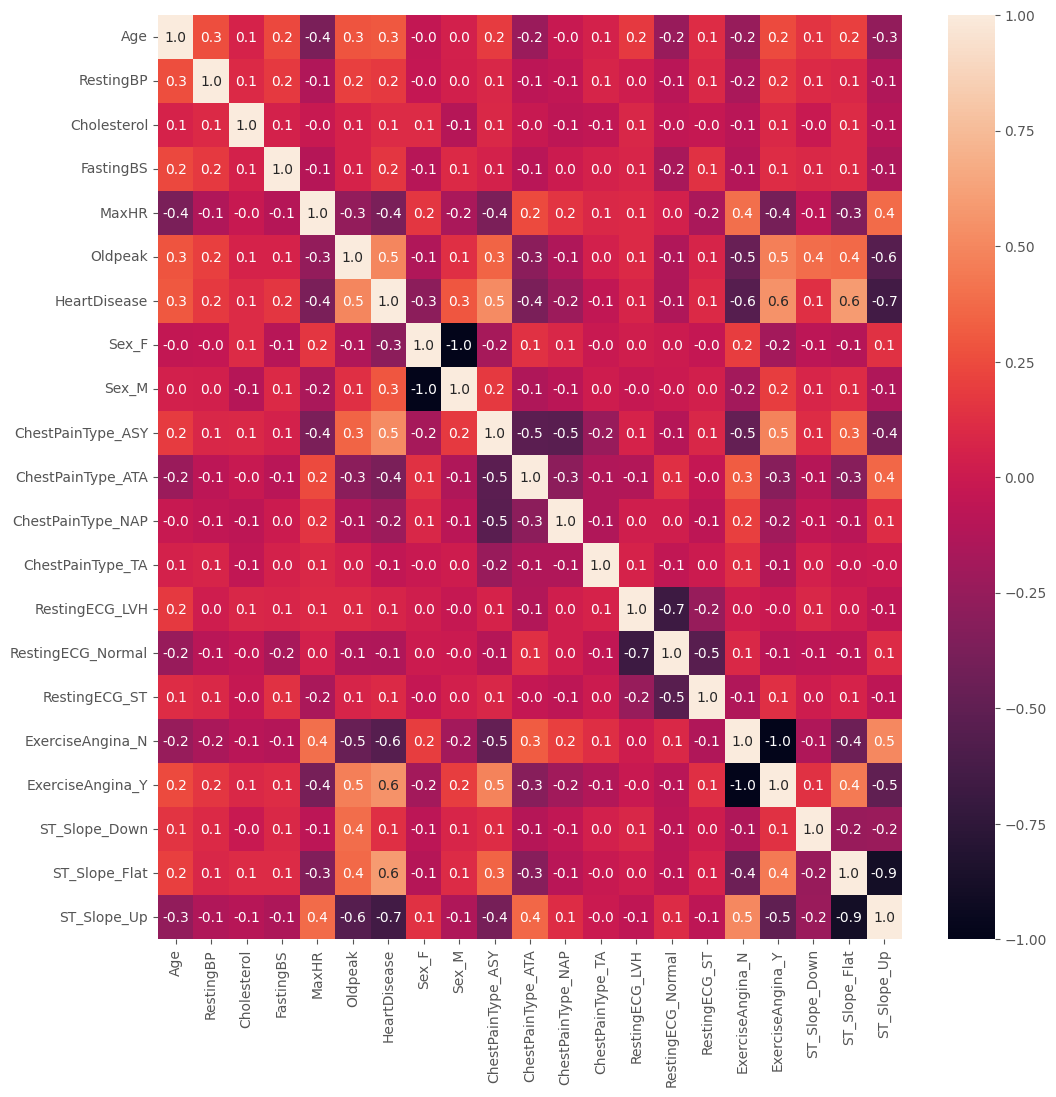

In [66]:
corr = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, fmt='.1f')
plt.show()

In [67]:
highly_correlated = corr['HeartDisease'][np.abs(corr['HeartDisease']) >= 0.5]
print(highly_correlated)

HeartDisease         1.000000
ChestPainType_ASY    0.522982
ExerciseAngina_N    -0.551834
ExerciseAngina_Y     0.551834
ST_Slope_Flat        0.591554
ST_Slope_Up         -0.653759
Name: HeartDisease, dtype: float64


In [68]:
encoded_df = df.drop(columns=bin_cols, errors='ignore')
cat = [col for col in encoded_df.columns if encoded_df[col].nunique() > 2]

for col in cat:
    fig = px.histogram(encoded_df, x=col)
    fig.show()

In [69]:
df.isnull().sum()

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_F                0
Sex_M                0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_N     0
ExerciseAngina_Y     0
ST_Slope_Down        0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['HeartDisease']), df['HeartDisease'], stratify=df['HeartDisease'], test_size=0.3, random_state=42)

In [71]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Data training and performance evaluation

<div class="alert alert-block alert-danger"> 
    
1. Train the following algorithms on the generated training dataset: Gaussian Naive Bayes, KNN(K=3), and decision tree (max_depth=6).
2. Display and save the tree generated by the decision tree algorithm.
3. Implement the SVM algorithm from scratch and apply it to the dataset.
4. Print the classification reports and confusion matrices of all models on the testing set. Discuss the obtained results.
5. Display the ROC curves of the generated models in one plot.
6. Which evaluation metric do you recommend for this dataset?
7. Predict the class of the third sample from the testing set based on the best-performing model.
8. Perform the cross-validation evaluation method on the best model based on the selected metric.
</div>

In [72]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [74]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [75]:
tree = DecisionTreeClassifier(max_depth=6, criterion='entropy')

tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

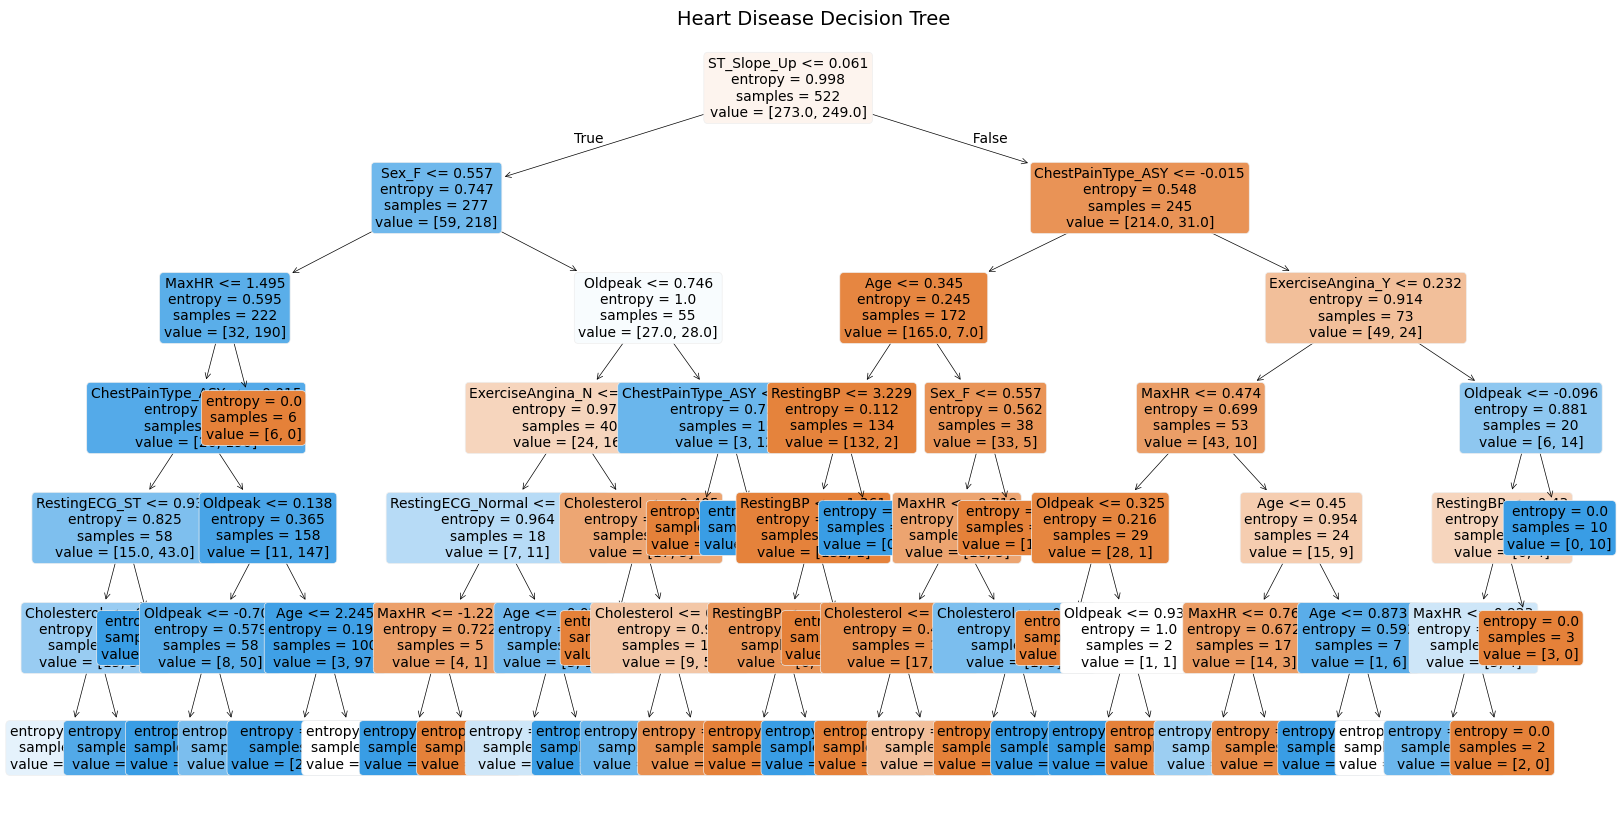

In [76]:
plt.figure(figsize=(20, 10))

# Define feature names after one-hot encoding
feature_names = [
    'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
    'Sex_F', 'Sex_M',
    'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
    'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
    'ExerciseAngina_N', 'ExerciseAngina_Y',
    'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'
]

plot_tree(tree,
          feature_names=feature_names,
          filled=True,
          rounded=True,
          fontsize=10)

plt.title('Heart Disease Decision Tree', fontsize=14)
plt.show()

#nkhyrou best split

<div class="alert alert-block alert-danger"> 
    
1. Train the following algorithms on the generated training dataset: Gaussian Naive Bayes, KNN(K=3), and decision tree (max_depth=6).
2. Display and save the tree generated by the decision tree algorithm.
3. Implement the SVM algorithm from scratch and apply it to the dataset.
4. Print the classification reports and confusion matrices of all models on the testing set. Discuss the obtained results.
5. Display the ROC curves of the generated models in one plot.
6. Which evaluation metric do you recommend for this dataset?
7. Predict the class of the third sample from the testing set based on the best-performing model.
8. Perform the cross-validation evaluation method on the best model based on the selected metric.
</div>

In [ ]:
import numpy as np
from sklearn.base import ClassifierMixin, BaseEstimator


class SVM(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.001, C=1.0, max_iter=1000):
        self.learning_rate = learning_rate
        self.C = C  #How much to penalize mistakes (strictness level)
        self.max_iter = max_iter
        self.w = None
        self.b = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.max_iter):
            for idx, (xi, yi) in enumerate(zip(X, y)):#xi vector te3 feature, yi label
                condition = yi * (np.dot(self.w, xi) + self.b) <= 1
# If score <= 1:  # Point is too close or on wrong side
#     → Need to adjust line
# Else:           # Point is well-classified
#     → Leave it alone
                if condition:
                    dw = self.w - self.C * yi * xi
                    db = -self.C * yi
                else:
                    dw = self.w
                    db = 0
                self.w -= self.learning_rate * dw
                self.b -= self.learning_rate * db

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

    def predict_proba(self, X):
        margins = np.dot(X, self.w) + self.b
        probs_pos = 1 / (1 + np.exp(-margins))
        probs_neg = 1 - probs_pos
        return np.vstack((probs_neg, probs_pos)).T

In [78]:
svm = SVM()
svm.fit(X_train, y_train)

In [79]:
y_test_ = np.where(y_test == 0, -1, 1)

In [80]:
svm.score(X_test, y_test_)

0.47767857142857145

In [81]:
from sklearn.metrics import confusion_matrix, r2_score, f1_score, classification_report, roc_curve, auc, RocCurveDisplay

In [86]:
y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_gnb = gnb.predict(X_test)
for y_pred in [y_pred_svm, y_pred_knn, y_pred_gnb]:
    print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

              precision    recall  f1-score   support

         1.0       0.48      1.00      0.65       107

   micro avg       0.48      1.00      0.65       107
   macro avg       0.48      1.00      0.65       107
weighted avg       0.48      1.00      0.65       107

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       117
           1       0.84      0.91      0.87       107

    accuracy                           0.88       224
   macro avg       0.88      0.88      0.87       224
weighted avg       0.88      0.88      0.88       224

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       117
           1       0.86      0.88      0.87       107

    accuracy                           0.88       224
   macro avg       0.87      0.88      0.87       224
weighted avg       0.88      0.88      0.88       224



In [83]:
y_probs_knn, y_probs_gnb = knn.predict_proba(X_test)[:, 0], gnb.predict_proba(X_test)[:, 0]
y_probs_svm = svm.predict_proba(X_test)[:, 0]
y_probs_svm

array([0.26580728, 0.26580728, 0.26580728, 0.26580728, 0.26580728,
       0.26580728, 0.26580728, 0.26580728, 0.26580728, 0.26580728,
       0.26580728, 0.26580728, 0.26580728, 0.26580728, 0.26580728,
       0.26580728, 0.26580728, 0.26580728, 0.26580728, 0.26580728,
       0.26580728, 0.26580728, 0.26580728, 0.26580728, 0.26580728,
       0.26580728, 0.26580728, 0.26580728, 0.26580728, 0.26580728,
       0.26580728, 0.26580728, 0.26580728, 0.26580728, 0.26580728,
       0.26580728, 0.26580728, 0.26580728, 0.26580728, 0.26580728,
       0.26580728, 0.26580728, 0.26580728, 0.26580728, 0.26580728,
       0.26580728, 0.26580728, 0.26580728, 0.26580728, 0.26580728,
       0.26580728, 0.26580728, 0.26580728, 0.26580728, 0.26580728,
       0.26580728, 0.26580728, 0.26580728, 0.26580728, 0.26580728,
       0.26580728, 0.26580728, 0.26580728, 0.26580728, 0.26580728,
       0.26580728, 0.26580728, 0.26580728, 0.26580728, 0.26580728,
       0.26580728, 0.26580728, 0.26580728, 0.26580728, 0.26580

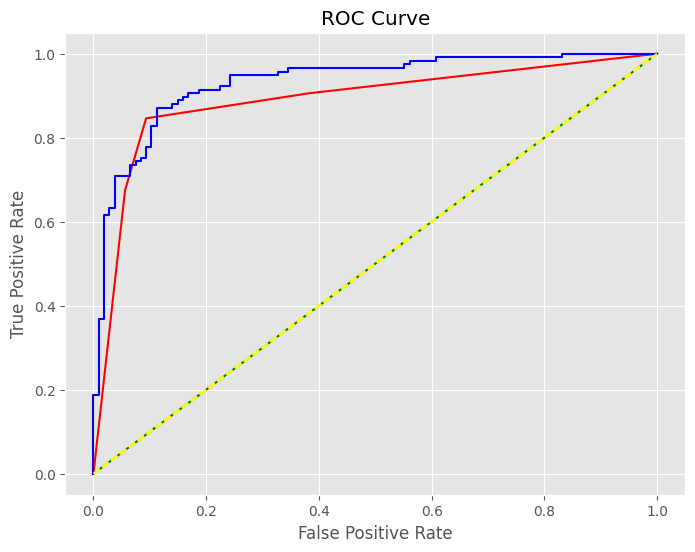

C:\Users\user\AppData\Local\Temp\ipykernel_29140\1311967099.py:13: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



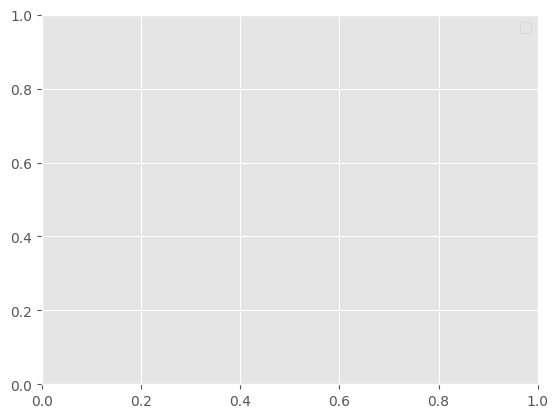

In [85]:
tpr_svm, fpr_svm, thresholds = roc_curve(y_test_, y_probs_svm)
tpr_knn, fpr_knn, thresholds = roc_curve(y_test, y_probs_knn)
tpr_gnb, fpr_gnb, thresholds = roc_curve(y_test, y_probs_gnb)
plt.figure(figsize=(8, 6))
for (fpr, tpr, color) in [(fpr_svm, tpr_svm, 'green'), (fpr_knn, tpr_knn, 'red'), (fpr_gnb, tpr_gnb, 'blue')]:
    plt.plot(fpr, tpr, color=color, label="ROC Curve")
    plt.plot([0, 1], [0, 1], color='yellow', linestyle='--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")

plt.show()
plt.legend()